In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Detection of Isolated Pixels using the Hit Or Miss Transform

Original Image


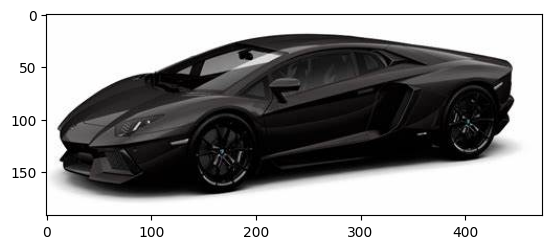

In [2]:
image = cv2.imread('../data/black_car.jfif')
#image = cv2.imread('../data/sculpture_image.jpg')
plt.imshow(image, cmap='gray')
print('Original Image')

source image Image


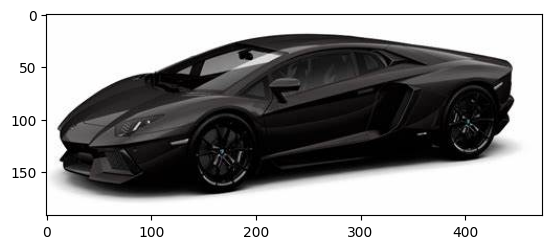

damaged image


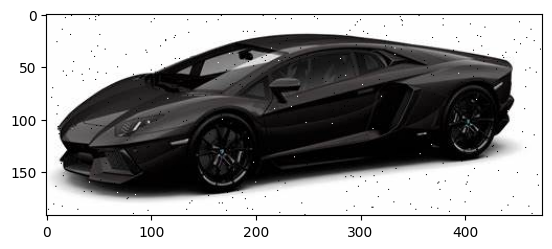

damaged image + threshold


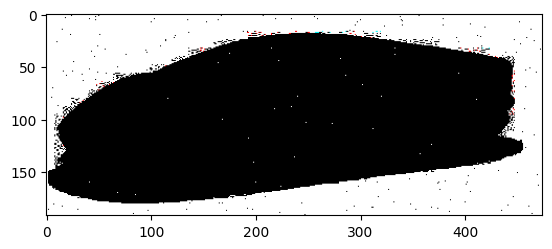

In [3]:
damaged_image = image.copy()
plt.imshow(damaged_image, cmap='gray')
print('source image Image') 
plt.show()

# Generate salt and pepper noise randomly.
for i in range((image.shape[0])):
    for j in range((image.shape[1])):
        r = np.random.randint(0,200)
        if r == 50:
            replacement_color = (0, 0, 0)
            if np.random.randint(0,10) == 1:
                replacement_color = (255, 255, 255)

            damaged_image[i][j] =  replacement_color

plt.imshow(damaged_image, cmap='gray')
print('damaged image')
plt.show()

damaged_image_thresholded = cv2.threshold(damaged_image, 250, 255, cv2.THRESH_BINARY)[1]

plt.imshow(damaged_image_thresholded, cmap='gray')
print('damaged image + threshold')
plt.show()



Using Hit or miss trasnsform for isolated pixel detection (black)

Hit or Miss Transform : Used for pattern matching in binary images.
Finds pixels whose neighbourhood matches shape of a first structuring element B1 while not matching shape of second strucring element B2 at the same time.

A (Hit Or Miss) B = (A (-) B1 ) intersection (A^-1 (-) B2)

Damaged image + threshold


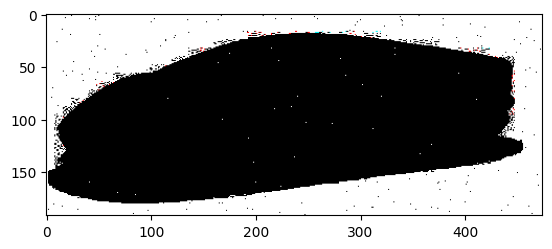

result of hit or miss (for black pixels


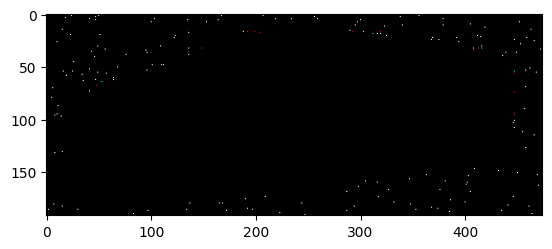

In [4]:
damaged_image_thresholded_complement = cv2.bitwise_not(damaged_image_thresholded)

kernel1 = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]], np.uint8)

kernel2 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]], np.uint8)

hitormiss1 = cv2.morphologyEx(damaged_image_thresholded, cv2.MORPH_ERODE, kernel1)
hitormiss2 = cv2.morphologyEx(damaged_image_thresholded_complement, cv2.MORPH_ERODE, kernel2)
hitormiss_black_pixel_detection = cv2.bitwise_and(hitormiss1, hitormiss2)
plt.imshow(damaged_image_thresholded)
print('Damaged image + threshold')
plt.show()

plt.imshow(hitormiss_black_pixel_detection)
print('result of hit or miss (for black pixels')

Hit or miss transform for white pixels

Damaged image + threshold


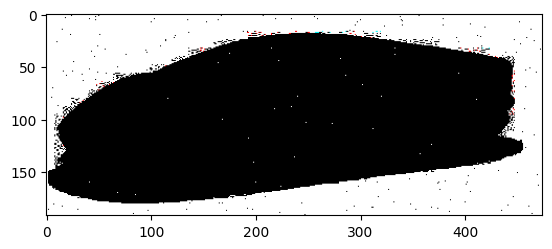

result of hit or miss (for white pixels)


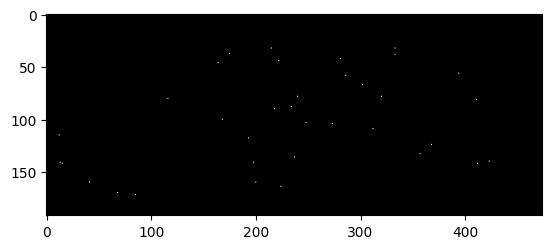

In [5]:
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]], np.uint8)
                    
kernel2 = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]], np.uint8)

damaged_image_thresholded_complement = cv2.bitwise_not(damaged_image_thresholded)

hitormiss1 = cv2.morphologyEx(damaged_image_thresholded, cv2.MORPH_ERODE, kernel1)
hitormiss2 = cv2.morphologyEx(damaged_image_thresholded_complement, cv2.MORPH_ERODE, kernel2)
hitormiss_white_pixel_detection = cv2.bitwise_and(hitormiss1, hitormiss2)
plt.imshow(damaged_image_thresholded)
print('Damaged image + threshold')
plt.show()

plt.imshow(hitormiss_white_pixel_detection)
print('result of hit or miss (for white pixels)')

Source Image, Damaged Image, Black pixel and white pixels (isolated)

source image


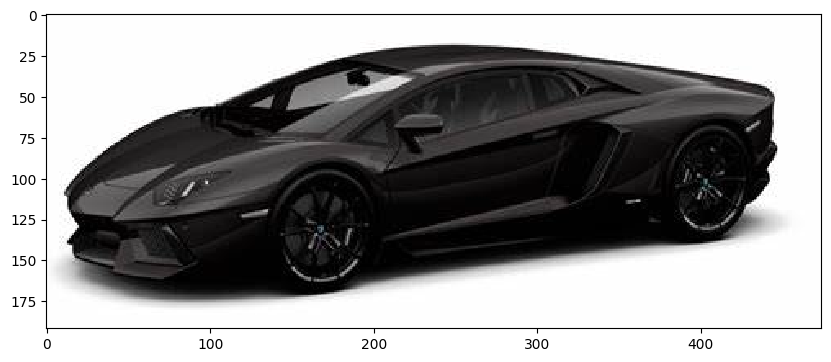

damaged image


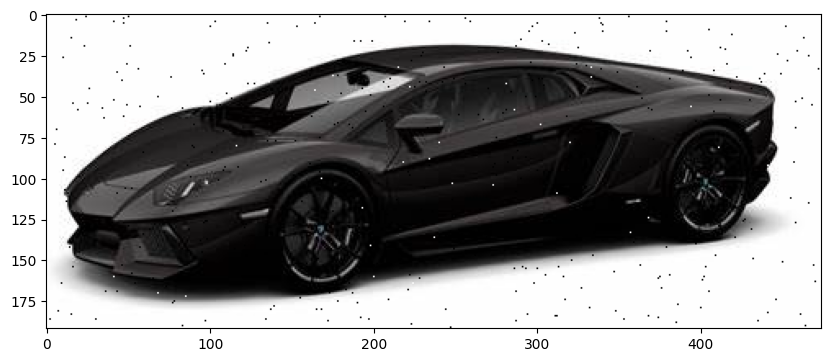

isolated pixels (perhaps due to camera defects


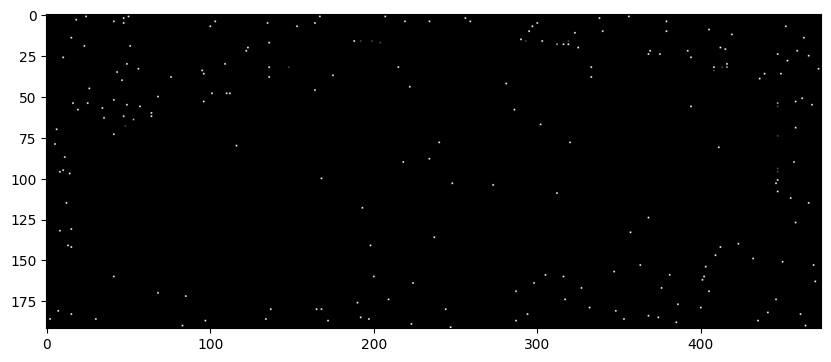

highlighting detected isolated pixels over source damaged image


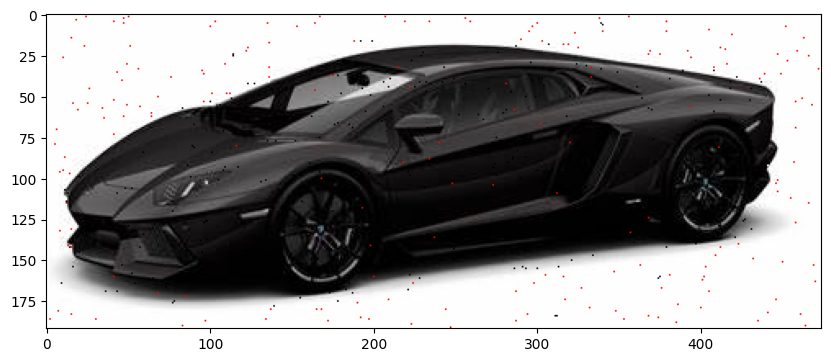

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(image, interpolation='nearest')
print('source image')
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(damaged_image)
print('damaged image')
plt.show()

highlighted_damaged_image = damaged_image
hit_or_miss_result = cv2.cvtColor(hitormiss_black_pixel_detection + hitormiss_white_pixel_detection, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (10,10))
plt.imshow(hit_or_miss_result, cmap='gray')
print('isolated pixels (perhaps due to camera defects')
plt.show()

for i in range((highlighted_damaged_image.shape[0])):
    for j in range((highlighted_damaged_image.shape[1])):
        if hit_or_miss_result[i][j] == 255:
            highlighted_damaged_image[i][j] = (255, 0, 0)

plt.figure(figsize = (10,10))
plt.imshow(highlighted_damaged_image)
print('highlighting detected isolated pixels over source damaged image')

Modified Kernel

Damaged image + threshold


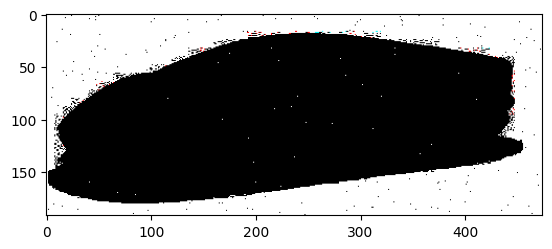

result of hit or miss (for white pixels)


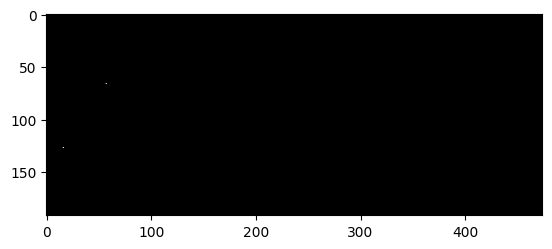

In [7]:
kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], np.uint8)
                    
kernel2 = np.array([[1, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1]], np.uint8)

damaged_image_thresholded_complement = cv2.bitwise_not(damaged_image_thresholded)

hitormiss1 = cv2.morphologyEx(damaged_image_thresholded, cv2.MORPH_ERODE, kernel1)
hitormiss2 = cv2.morphologyEx(damaged_image_thresholded_complement, cv2.MORPH_ERODE, kernel2)
hitormiss_white_pixel_detection = cv2.bitwise_and(hitormiss1, hitormiss2)
plt.imshow(damaged_image_thresholded)
print('Damaged image + threshold')
plt.show()

plt.imshow(hitormiss_white_pixel_detection)
print('result of hit or miss (for white pixels)')

source image


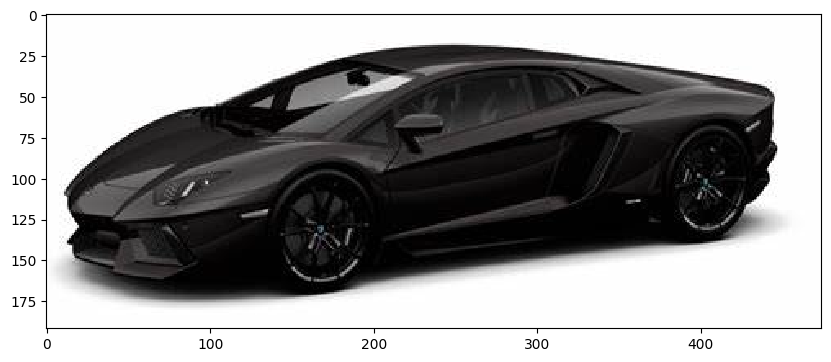

damaged image


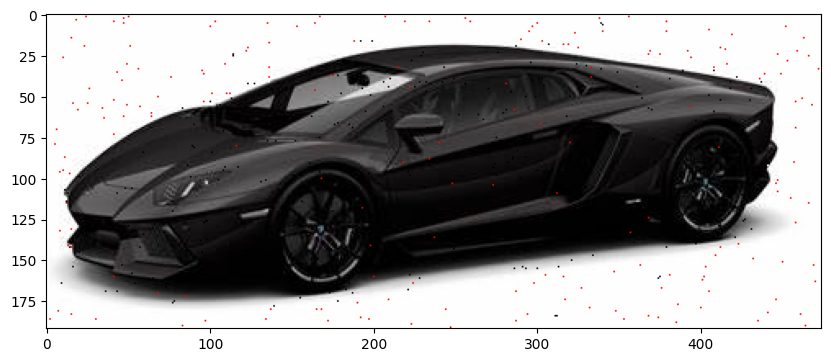

isolated pixels (perhaps due to camera defects


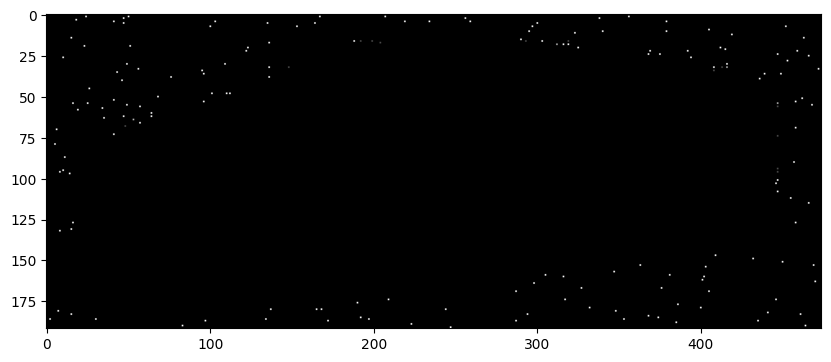

highlighting detected isolated pixels over source damaged image


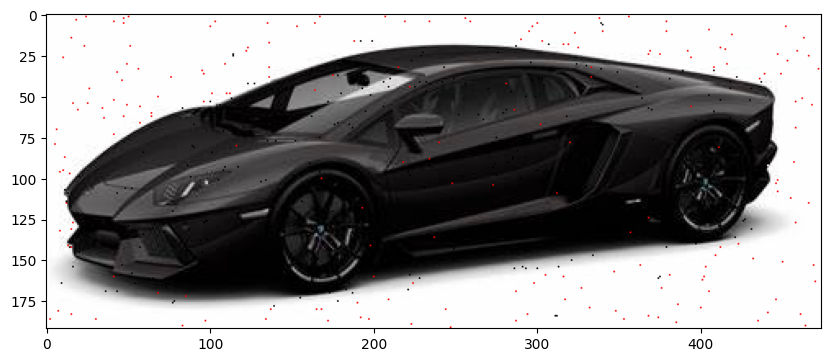

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(image, interpolation='nearest')
print('source image')
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(damaged_image)
print('damaged image')
plt.show()

highlighted_damaged_image = damaged_image
hit_or_miss_result = cv2.cvtColor(hitormiss_black_pixel_detection + hitormiss_white_pixel_detection, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (10,10))
plt.imshow(hit_or_miss_result, cmap='gray')
print('isolated pixels (perhaps due to camera defects')
plt.show()

for i in range((highlighted_damaged_image.shape[0])):
    for j in range((highlighted_damaged_image.shape[1])):
        if hit_or_miss_result[i][j] == 255:
            highlighted_damaged_image[i][j] = (255, 0, 0)

plt.figure(figsize = (10,10))
plt.imshow(highlighted_damaged_image)
print('highlighting detected isolated pixels over source damaged image')